<a href="https://www.kaggle.com/code/rohanambad/recommendation-system-for-crops?scriptVersionId=109414827" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crop-recommendation-csv/crop.csv


In [2]:
pip install IPython

Note: you may need to restart the kernel to use updated packages.


In [3]:
import IPython
import pandas as pd 
import numpy as np  # to work on multidimensional arrray
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline  
import seaborn as sns # data visualization library more interactive graph
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")


In [4]:
data = pd.read_csv("../input/crop-recommendation-csv/crop.csv")

In [5]:
data.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
data.tail(5)

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [7]:
data.shape # to check rows and columns

(2200, 8)

In [8]:
data.columns # to check names of columns in data set

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [9]:
data.duplicated().sum() # to check there are duplicate value or not
#data.drop_duplicates() to drop duplicate values

0

In [10]:
data.isnull().sum() # to check the null values in dataset

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
data.info() # to get general info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [12]:
data.describe() # to have statistical decription of data

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [13]:
data.nunique() # to get unique values in data

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [14]:
data['label'].unique() # to check unique values of label

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [15]:
data['label'].value_counts() # to get the value counts of labels

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [16]:
crop_summary=pd.pivot_table(data,index=['label'],aggfunc='mean')

In [17]:
crop_summary

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [18]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

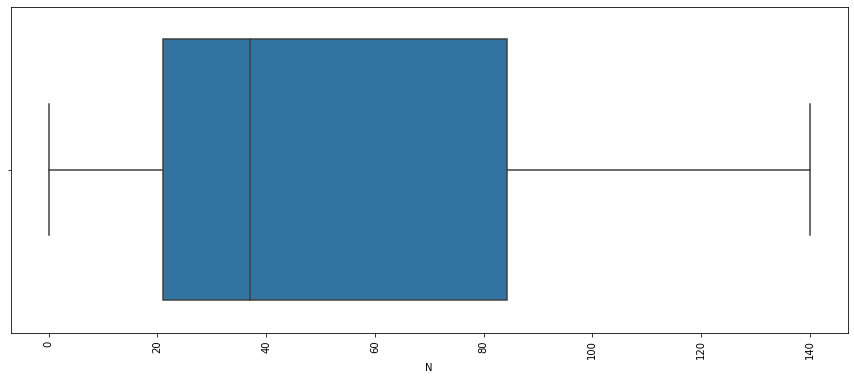

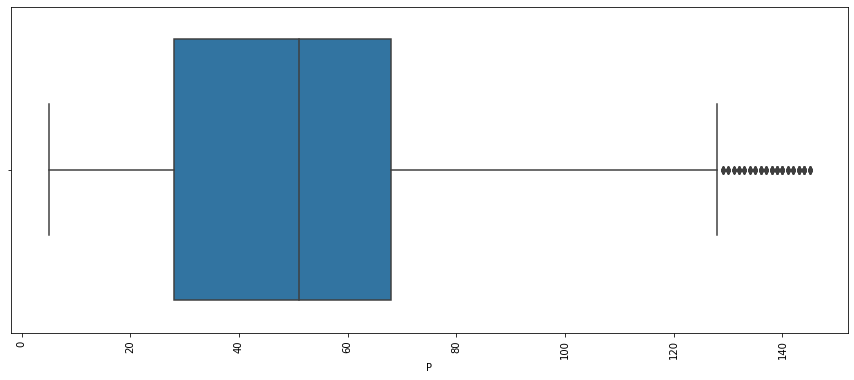

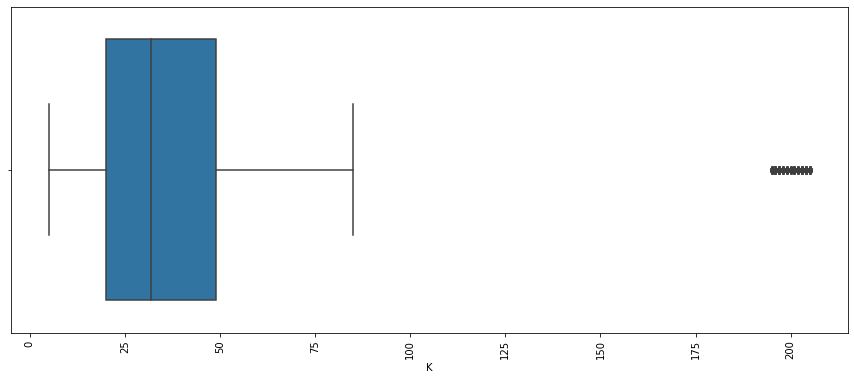

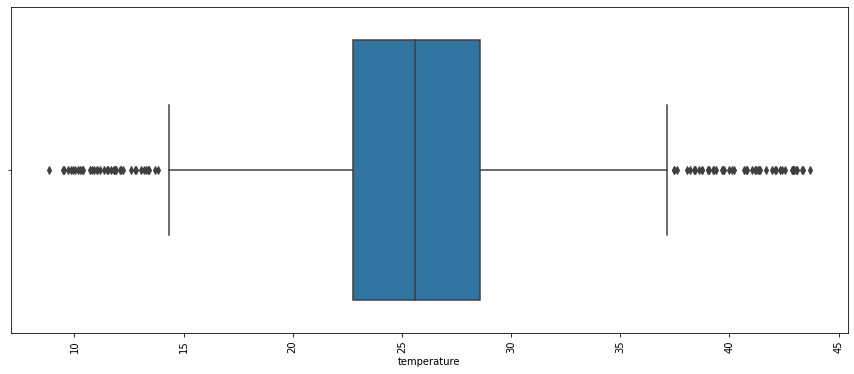

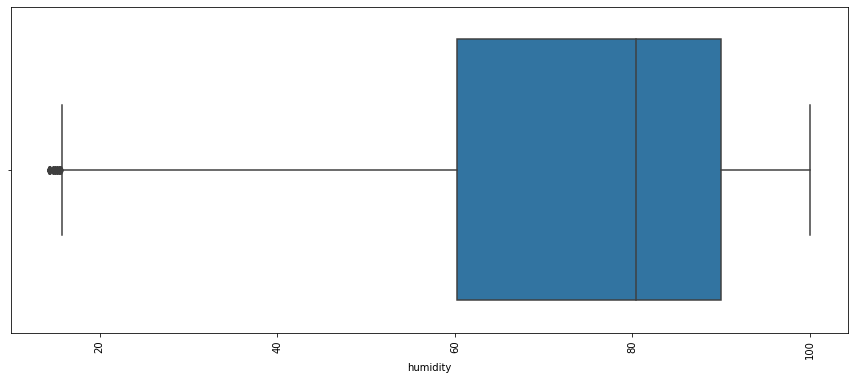

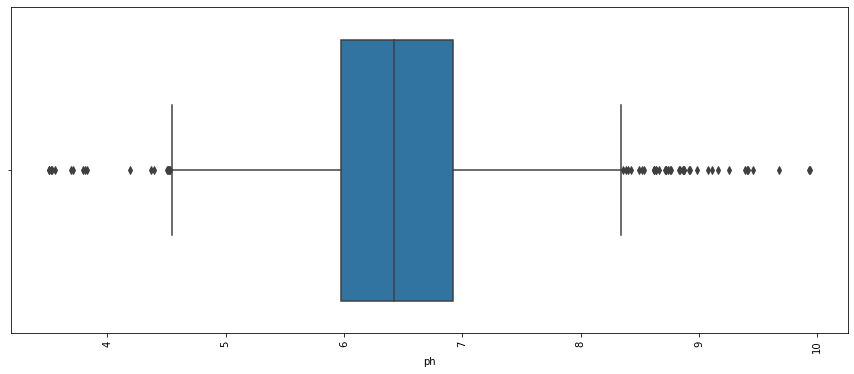

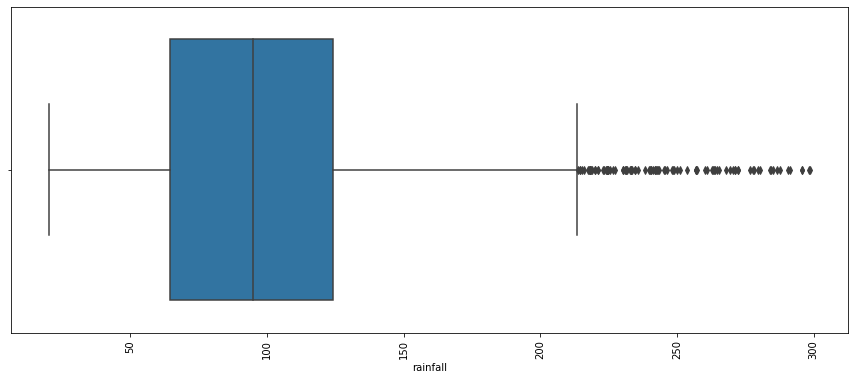

In [19]:
data1=data[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
for i in data1.columns:
    plt.figure(figsize=(15,6))
    sns.boxplot(data1[i])
    plt.xticks(rotation=90)
    plt.show()

In [20]:
print(np.where(data['rainfall']>220)) #print the outlier values of array

(array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   15,   16,   18,   19,   21,   23,   24,   25,   26,   27,
         28,   30,   32,   33,   34,   36,   37,   38,   39,   40,   43,
         44,   47,   49,   53,   54,   55,   57,   59,   60,   61,   62,
         64,   67,   68,   69,   71,   72,   74,   75,   76,   82,   84,
         85,   86,   88,   89,   90,   91,   93,   94,   96,   97, 1700,
       1703, 1712, 1723, 1726, 1758, 1759, 1778, 1783, 1784, 1787, 1793,
       1797, 1800, 1801, 1849, 1859, 1865, 1881, 1892, 1894]),)


In [21]:
print(len(np.where(data['rainfall']>220)))

1


In [22]:
Q1=np.percentile(data['rainfall'],25,interpolation='midpoint')

In [23]:
Q3=np.percentile(data['rainfall'],75,interpolation='midpoint')

In [24]:
IQR=Q3-Q1

In [25]:
upper_bound=Q3+1.5*IQR
lower_bound=Q1-1.5*IQR

In [26]:
print(data['rainfall']>upper_bound)

0       False
1        True
2        True
3        True
4        True
        ...  
2195    False
2196    False
2197    False
2198    False
2199    False
Name: rainfall, Length: 2200, dtype: bool


In [27]:
print(data.iloc[6])

N                     69
P                     55
K                     38
temperature    22.708838
humidity       82.639414
ph              5.700806
rainfall       271.32486
label               rice
Name: 6, dtype: object


In [28]:
crop_summary_new=crop_summary.reset_index() #by reseting your index will come into the dataset

In [29]:
crop_summary_new

,label,K,N,P,humidity,ph,rainfall,temperature
0,apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
1,banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
2,blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
3,chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
4,coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
5,coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
6,cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
7,grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
8,jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376
9,kidneybeans,20.05,20.75,67.54,21.605357,5.749411,105.919778,20.115085


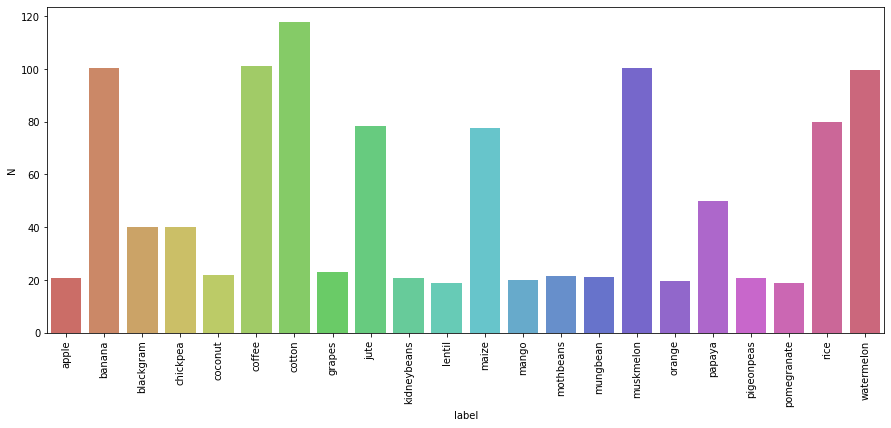

In [30]:
plt.figure(figsize=(15,6))
sns.barplot(y='N',x='label',data=crop_summary_new,palette='hls')
plt.xticks(rotation=90)
plt.show()

In [31]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [32]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [33]:
fig1= px.bar(crop_summary_new,x='label',y='N')
fig1.show()

In [34]:
fig1= px.bar(crop_summary_new,x='label',y='P')
fig1.show()

In [35]:
fig1= px.bar(crop_summary_new,x='label',y='K')
fig1.show()

In [36]:
colorarr = ['#0592D0','#Cd7f32', '#E97451', '#Bdb76b', '#954535', '#C2b280', '#808000','#C2b280', '#E4d008','#9acd32','#Eedc82','E4d96f',
            '#32cd32','#39ff14','#00ff7f', '#008080', '#36454f', '#F88379', '#Ff4500', '#Ffb347', '#A94064','#E75480','#Ffb6c1','#E5e42',
            '#Faf0e6', '#8c92ac', '#Dbd7d2','#A7a6ba', '#B38b6d']

In [37]:
import random
from IPython.core.display import update_display

In [38]:
crop_summary_N=crop_summary.sort_values(by='N',
                                        ascending=False)

fig=make_subplots(rows=1,cols=2)          # arranging them in 1 row and 2 coloumns by taking dictionary

top = {
    'y': crop_summary_N['N'][0:10].sort_values().index,
    'x': crop_summary_N['N'][0:10].sort_values() 
}
last={
    'y': crop_summary_N['N'][-10:].index,
    'x': crop_summary_N['N'][-10:] 
}
fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
         text=top['x']),

    row=1,col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1,col=2
)
fig.update_traces(texttemplate='%{text}',textposition='inside')
fig.update_layout(title_text="nitrogen(N)", # text title
                plot_bgcolor='white', # background color
                font_size=7,  #font size
                font_color='black',#FONT COLOR
                height=500)

fig.update_xaxes(showgrid=False )
fig.update_yaxes(showgrid=False )
fig.show()

In [39]:
crop_summary_P=crop_summary.sort_values(by='P',
                                        ascending=False)

fig=make_subplots(rows=1,cols=2)          # arranging them in 1 row and 2 coloumns by taking dictionary

top = {
    'y': crop_summary_P['P'][0:10].sort_values().index,
    'x': crop_summary_P['P'][0:10].sort_values() 
}
last={
    'y': crop_summary_P['P'][-10:].index,
    'x': crop_summary_P['P'][-10:] 
}
fig.add_trace(
    go.Bar(top,
           name="Most nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
         text=top['x']),

    row=1,col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1,col=2
)
fig.update_traces(texttemplate='%{text}',textposition='inside')
fig.update_layout(title_text="phosphorus(P)", # text title
                plot_bgcolor='white', # background color
                font_size=7,  #font size
                font_color='black',#FONT COLOR
                height=500)

fig.update_xaxes(showgrid=False )
fig.update_yaxes(showgrid=False )
fig.show()

In [40]:
crop_summary_K=crop_summary.sort_values(by='K',
                                        ascending=False)

fig=make_subplots(rows=1,cols=2)          # arranging them in 1 row and 2 coloumns by taking dictionary

top = {
    'y': crop_summary_K['K'][0:10].sort_values().index,
    'x': crop_summary_K['K'][0:10].sort_values() 
}
last={
    'y': crop_summary_K['K'][-10:].index,
    'x': crop_summary_K['K'][-10:] 
}
fig.add_trace(
    go.Bar(top,
           name="Most potassium required",
           marker_color=random.choice(colorarr),
           orientation='h',
         text=top['x']),

    row=1,col=1
)
fig.add_trace(
    go.Bar(last,
           name="Least nitrogen required",
           marker_color=random.choice(colorarr),
           orientation='h',
          text=last['x']),
    row=1,col=2
)
fig.update_traces(texttemplate='%{text}',textposition='inside')
fig.update_layout(title_text="potassium(K)", # text title
                plot_bgcolor='white', # background color
                font_size=7,  #font size
                font_color='black',#FONT COLOR
                height=500)

fig.update_xaxes(showgrid=False )
fig.update_yaxes(showgrid=False )
fig.show()

In [41]:
fig = go.Figure()
fig.add_trace(go.Bar(
x=crop_summary.index,
y=crop_summary['N'],
name='Nitrogen',
marker_color='indianred'
))
fig.add_trace(go.Bar(
x=crop_summary.index,
y=crop_summary['P'],
name='Pohosphous',
marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
x=crop_summary.index,
y=crop_summary['K'],
name='Potash',
marker_color='crimson'
))
fig.update_layout(title="N, P, K values comparision between crops",
plot_bgcolor='white',
barmode='group',
xaxis_tickangle=-45)
fig.show()

In [42]:
labels = ['Nitrogen(N)','Phosphorous(P)','Potash(K)']
fig = make_subplots(rows=1, cols=5, specs=[[{'type':'domain'}, {'type':'domain'},
                                            {'type':'domain'}, {'type':'domain'}, 
                                            {'type':'domain'}]])

rice_npk = crop_summary[crop_summary.index=='rice']
values = [rice_npk['N'][0], rice_npk['P'][0], rice_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Rice"),1, 1)

cotton_npk = crop_summary[crop_summary.index=='cotton']
values = [cotton_npk['N'][0], cotton_npk['P'][0], cotton_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Cotton"),1, 2)

jute_npk = crop_summary[crop_summary.index=='jute']
values = [jute_npk['N'][0], jute_npk['P'][0], jute_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Jute"),1, 3)

maize_npk = crop_summary[crop_summary.index=='maize']
values = [maize_npk['N'][0], maize_npk['P'][0], maize_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Maize"),1, 4)

lentil_npk = crop_summary[crop_summary.index=='lentil']
values = [lentil_npk['N'][0], lentil_npk['P'][0], lentil_npk['K'][0]]
fig.add_trace(go.Pie(labels=labels, values=values,name="Lentil"),1, 5)

fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="NPK ratio for rice, cotton, jute, maize, lentil",
    annotations=[dict(text='Rice',x=0.06,y=0.8, font_size=7, showarrow=False),
                 dict(text='Cotton',x=0.26,y=0.8, font_size=7, showarrow=False),
                 dict(text='Jute',x=0.50,y=0.8, font_size=7, showarrow=False),
                 dict(text='Maize',x=0.74,y=0.8, font_size=7, showarrow=False),
                dict(text='Lentil',x=0.94,y=0.8, font_size=7, showarrow=False)])
fig.show()

In [43]:
crop_scatter=data[(data['label']=='rice') |
                (data['label']=='jute') |
                (data['label']=='cotton') |
                (data['label']=='maize') |
                (data['label']=='lentil') ]
fig=px.scatter(crop_scatter,x="temperature",y="humidity",color="label",symbol="label")
fig.update_layout(plot_bgcolor='pink')
fig.update_xaxes(showgrid=True)
fig.update_yaxes(showgrid=True)

fig.show()

In [44]:
fig=px.bar(crop_summary,x=crop_summary.index,y=["rainfall", "temperature", "humidity"])
fig.update_layout(title_text="Comparision between rainfall, temerature and humidity",
                  plot_bgcolor='white',
                 height=500)
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [45]:
data.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


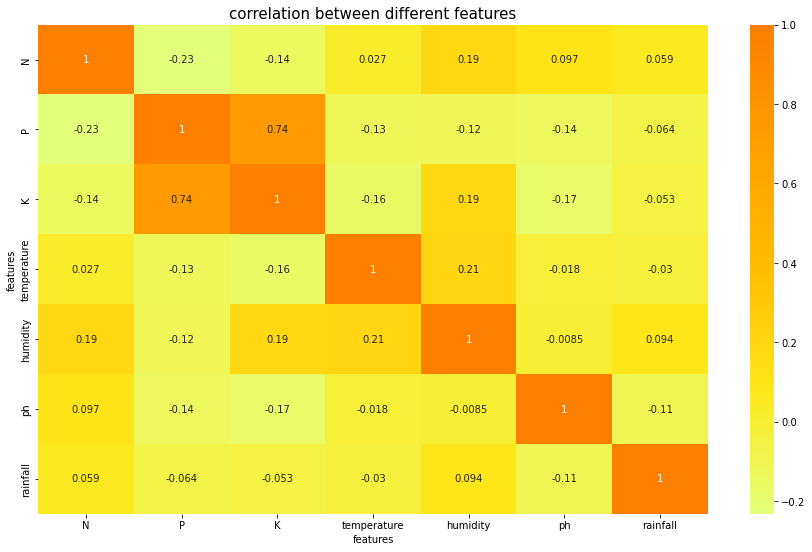

In [46]:
fig,ax=plt.subplots(1,1,figsize=(15,9))
sns.heatmap(data.corr(),annot=True,cmap='Wistia')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('correlation between different features',fontsize=15, c='black')
plt.show()

In [47]:
X=data.drop('label',axis=1)
y=data['label']

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,
                                               shuffle=True,random_state=0)

In [49]:
import lightgbm as lgb
model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

LGBMClassifier()

In [50]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9890


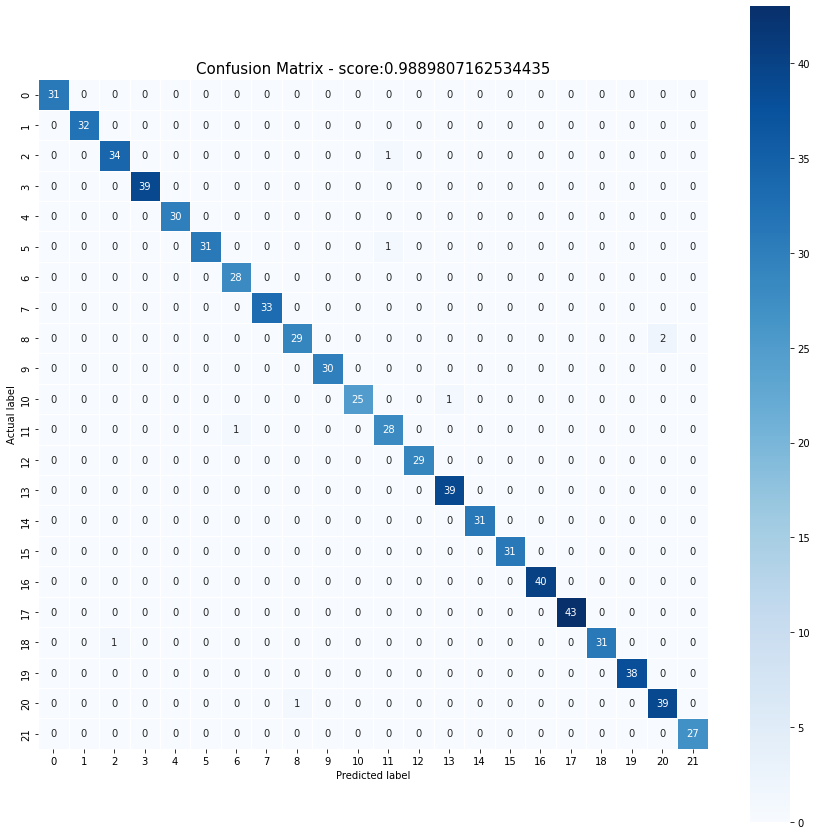

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      0.97      0.97        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      0.97      0.98        32
      cotton       0.97      1.00      0.98        28
      grapes       1.00      1.00      1.00        33
        jute       0.97      0.94      0.95        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.96      0.98        26
       maize       0.93      0.97      0.95        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.97      1.00      0.99        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       1.00    

In [54]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [55]:
Classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [56]:
y_pred=Classifier.predict(X_test)

In [57]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print('decision tree model accuracy score: {0:0.4f}'.format(accuracy_score(y_test,y_pred)))

decision tree model accuracy score: 0.9848


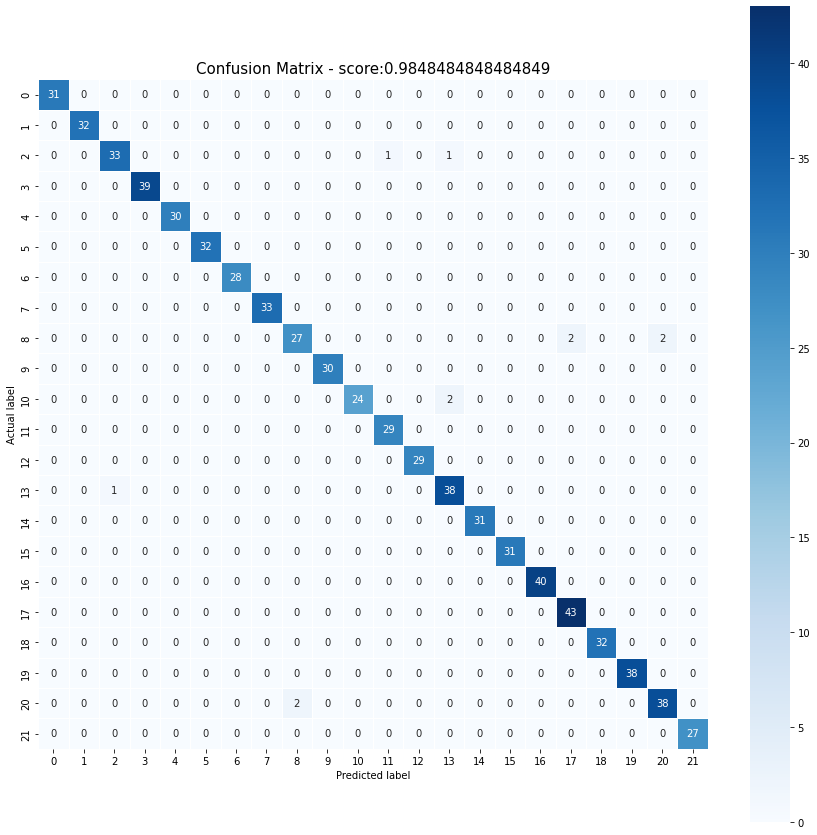

In [58]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.97      0.94      0.96        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.93      0.87      0.90        31
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      0.92      0.96        26
       maize       0.97      1.00      0.98        29
       mango       1.00      1.00      1.00        29
   mothbeans       0.93      0.97      0.95        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       0.96    

In [60]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(n_estimators=10,criterion="entropy")
classifier_rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [61]:
y_pred=classifier_rf.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Random Forest Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Random Forest Model accuracy score: 0.9945


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       1.00      1.00      1.00        35
    chickpea       1.00      1.00      1.00        39
     coconut       1.00      1.00      1.00        30
      coffee       1.00      1.00      1.00        32
      cotton       1.00      1.00      1.00        28
      grapes       1.00      1.00      1.00        33
        jute       0.97      1.00      0.98        31
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.96      1.00      0.98        26
       maize       1.00      1.00      1.00        29
       mango       1.00      1.00      1.00        29
   mothbeans       1.00      0.95      0.97        39
    mungbean       1.00      1.00      1.00        31
   muskmelon       0.97      1.00      0.98        31
      orange       1.00      1.00      1.00        40
      papaya       1.00    

In [64]:
from sklearn.linear_model import LogisticRegression


In [65]:
classifier_lr=LogisticRegression(random_state=0)

In [66]:
classifier_lr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [67]:
y_pred=classifier_lr.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('Logistic Regresion Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Logistic Regresion Model accuracy score: 0.9435


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        31
      banana       1.00      1.00      1.00        32
   blackgram       0.85      0.83      0.84        35
    chickpea       1.00      1.00      1.00        39
     coconut       0.94      1.00      0.97        30
      coffee       1.00      1.00      1.00        32
      cotton       0.85      1.00      0.92        28
      grapes       1.00      1.00      1.00        33
        jute       0.85      0.90      0.88        31
 kidneybeans       0.91      0.97      0.94        30
      lentil       0.89      0.92      0.91        26
       maize       0.96      0.83      0.89        29
       mango       0.91      1.00      0.95        29
   mothbeans       0.85      0.85      0.85        39
    mungbean       1.00      0.97      0.98        31
   muskmelon       1.00      1.00      1.00        31
      orange       1.00      1.00      1.00        40
      papaya       0.97    